In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

C:\Users\HARI\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_json('OUTPUT_CLEANED_telco_customer_churn.json')

In [5]:
# Droping Unused Columns
X = data.drop(['Churn Value', 'Churn Label', 'Churn Reason'], axis=1)
y = data['Churn Value']

In [6]:
non_numeric_cols = X.select_dtypes(include='object').columns
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [7]:

#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [8]:
#Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
#Evaluate Model
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9297374024130589

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1035
           1       0.87      0.86      0.87       374

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409


Confusion Matrix:
 [[987  48]
 [ 51 323]]


In [10]:
#Feature Importance Plot
importances = rf.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
top_feats = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

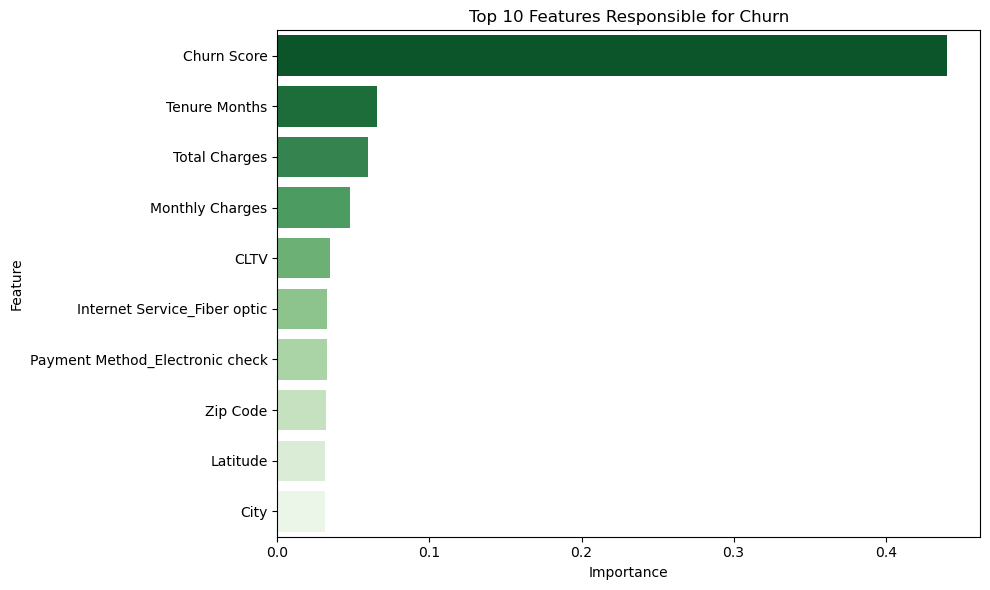

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_feats, palette='Greens_r')
plt.title('Top 10 Features Responsible for Churn')
plt.tight_layout()
plt.show()